# СОЗДАНИЕ МОДЕЛЕЙ 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Activation, Dropout

%matplotlib inline

In [2]:
# загрузка и просмотр датасета
df = pd.read_excel('../data/processed/df_clean.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


# Модуль упругости при растяжении и Прочность при растяжении

In [3]:
# хранение оценок моделей
MAE_Emod=[] # средняя абсолютная ошибка - Модуль упругости при растяжении
MSE_Emod=[] # среднеквадратическая ошибка - Модуль упругости при растяжении
R2_Emod=[] # коэффициент детерминации - Модуль упругости при растяжении

MAE_Rm=[] # средняя абсолютная ошибка - Прочность при растяжении
MSE_Rm=[] # среднеквадратическая ошибка - Прочность при растяжении
R2_Rm=[] # коэффициент детерминации - Прочность при растяжении

In [4]:
# выделение целевых переменных
y = df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
y_Emod = df[['Модуль упругости при растяжении, ГПа']]
y_Rm = df[['Прочность при растяжении, МПа']]
y.head()

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
1,70.0,3000.0
3,70.0,3000.0
4,70.0,3000.0
5,70.0,3000.0
6,70.0,3000.0


In [5]:
X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,70.0


In [6]:
# разбиение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [7]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [8]:
# разбиение нормализованных данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)

In [9]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 11)
(277, 11)
(645, 2)
(277, 2)


Linear Regression

In [10]:
modelLinear = LinearRegression()
modelLinear.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelLinear.predict(X_test_norm))
MAE_Linear_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Linear_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Linear_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Linear_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Linear_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Linear_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Linear_Emod)
print (MAE_Linear_Rm)
print (MSE_Linear_Emod)
print (MSE_Linear_Rm)
print (R2_Linear_Emod)
print (R2_Linear_Rm)

2.6109355505901184
372.05238450611114
10.152935631185066
214801.90979576955
-0.024476898005094228
-0.003529768950333745


In [11]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Linear',MAE_Linear_Emod])
MAE_Rm.append(['Linear',MAE_Linear_Rm])
MSE_Emod.append(['Linear',MSE_Linear_Emod])
MSE_Rm.append(['Linear',MSE_Linear_Rm])
R2_Emod.append(['Linear',R2_Linear_Emod])
R2_Rm.append(['Linear',R2_Linear_Rm])

Ridge regression

In [12]:
# Гиперпараметры для поиска по сетке
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

In [13]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)
cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [14]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'sparse_cg'}
Лучший средний балл перекрестной проверки:
-0.18973641934491686


In [15]:
# Модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAE_Ridge_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ridge_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Ridge_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Ridge_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ridge_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ridge_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ridge_Emod)
print (MAE_Ridge_Rm)
print (MSE_Ridge_Emod)
print (MSE_Ridge_Rm)
print (R2_Ridge_Emod)
print (R2_Ridge_Rm)

2.599809397945461
369.8851530162007
10.084931091094134
213957.89742814057
-0.017614933858623116
0.00041335956785881756


In [16]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Ridge',MAE_Ridge_Emod])
MAE_Rm.append(['Ridge',MAE_Ridge_Rm])
MSE_Emod.append(['Ridge',MSE_Ridge_Emod])
MSE_Rm.append(['Ridge',MSE_Ridge_Rm])
R2_Emod.append(['Ridge',R2_Ridge_Emod])
R2_Rm.append(['Ridge',R2_Ridge_Rm])

Lasso regression

In [17]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAE_Lasso_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Lasso_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Lasso_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Lasso_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Lasso_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Lasso_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Lasso_Emod)
print (MAE_Lasso_Rm)
print (MSE_Lasso_Emod)
print (MSE_Lasso_Rm)
print (R2_Lasso_Emod)
print (R2_Lasso_Rm)

2.5948108078737024
368.9355592328838
10.09572202309215
213322.56630912074
-0.018703787461314736
0.0033815533408245724


In [18]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Lasso',MAE_Lasso_Emod])
MAE_Rm.append(['Lasso',MAE_Lasso_Rm])
MSE_Emod.append(['Lasso',MSE_Lasso_Emod])
MSE_Rm.append(['Lasso',MSE_Lasso_Rm])
R2_Emod.append(['Lasso',R2_Lasso_Emod])
R2_Rm.append(['Lasso',R2_Lasso_Rm])

ElasticNet regression

In [19]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAE_Elastic_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Elastic_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Elastic_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Elastic_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Elastic_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Elastic_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Elastic_Emod)
print (MAE_Elastic_Rm)
print (MSE_Elastic_Emod)
print (MSE_Elastic_Rm)
print (R2_Elastic_Emod)
print (R2_Elastic_Rm)

2.5801929025662833
368.8669394882762
9.998351572705044
214058.58303888745
-0.00887867080603466
-5.703200261408803e-05


In [20]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['ElasticNet',MAE_Elastic_Emod])
MAE_Rm.append(['ElasticNet',MAE_Elastic_Rm])
MSE_Emod.append(['ElasticNet',MSE_Elastic_Emod])
MSE_Rm.append(['ElasticNet',MSE_Elastic_Rm])
R2_Emod.append(['ElasticNet',R2_Elastic_Emod])
R2_Rm.append(['ElasticNet',R2_Elastic_Rm])

GradientBoostingRegressor

In [21]:
# модель регрессии GradientBoostingRegressor
modelGBR_Emod = GradientBoostingRegressor()
modelGBR_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelGBR_Emod.predict(X_test_norm)
modelGBR_Rm = GradientBoostingRegressor()
modelGBR_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelGBR_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_GBR_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_GBR_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_GBR_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_GBR_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_GBR_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_GBR_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_GBR_Emod)
print (MAE_GBR_Rm)
print (MSE_GBR_Emod)
print (MSE_GBR_Rm)
print (R2_GBR_Emod)
print (R2_GBR_Rm)

2.688337119684182
382.3630823863721
11.060463664605681
225293.68233621877
-0.11605056086529042
-0.052546121195093054


In [22]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['GradientBoosting',MAE_GBR_Emod])
MAE_Rm.append(['GradientBoosting',MAE_GBR_Rm])
MSE_Emod.append(['GradientBoosting',MSE_GBR_Emod])
MSE_Rm.append(['GradientBoosting',MSE_GBR_Rm])
R2_Emod.append(['GradientBoosting',R2_GBR_Emod])
R2_Rm.append(['GradientBoosting',R2_GBR_Rm])

KNeighborsRegressor

In [23]:
modelNeihgbor_Emod = KNeighborsRegressor(n_neighbors=13)
modelNeihgbor_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelNeihgbor_Emod.predict(X_test_norm)
modelNeihgbor_Rm = KNeighborsRegressor()
modelNeihgbor_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelNeihgbor_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Neihgbor_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Neihgbor_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Neihgbor_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Neihgbor_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Neihgbor_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Neihgbor_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Neihgbor_Emod)
print (MAE_Neihgbor_Rm)
print (MSE_Neihgbor_Emod)
print (MSE_Neihgbor_Rm)
print (R2_Neihgbor_Emod)
print (R2_Neihgbor_Rm)

2.6225621597024773
400.581653879789
10.325154738425082
250632.24504259886
-0.04185458098976058
-0.1709249661618053


In [24]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['KNeighbors',MAE_Neihgbor_Emod])
MAE_Rm.append(['KNeighbors',MAE_Neihgbor_Rm])
MSE_Emod.append(['KNeighbors',MSE_Neihgbor_Emod])
MSE_Rm.append(['KNeighbors',MSE_Neihgbor_Rm])
R2_Emod.append(['KNeighbors',R2_Neihgbor_Emod])
R2_Rm.append(['KNeighbors',R2_Neihgbor_Rm])

DecisionTreeRegressor

In [25]:
# модель регрессии DecisionTreeRegressor
modelTree_Emod = DecisionTreeRegressor(max_depth=3)
modelTree_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelTree_Emod.predict(X_test_norm)

modelTree_Rm = DecisionTreeRegressor(max_depth=5)
modelTree_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Tree_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Tree_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Tree_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Tree_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Tree_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Tree_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Tree_Emod)
print (MAE_Tree_Rm)
print (MSE_Tree_Emod)
print (MSE_Tree_Rm)
print (R2_Tree_Emod)
print (R2_Tree_Rm)

2.6475022346453074
400.581653879789
10.735862076079544
250632.24504259886
-0.08329679972852566
-0.1709249661618053


In [26]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['DecisionTree',MAE_Tree_Emod])
MAE_Rm.append(['DecisionTree',MAE_Tree_Rm])
MSE_Emod.append(['DecisionTree',MSE_Tree_Emod])
MSE_Rm.append(['DecisionTree',MSE_Tree_Rm])
R2_Emod.append(['DecisionTree',R2_Tree_Emod])
R2_Rm.append(['DecisionTree',R2_Tree_Rm])

RandomForestRegressor

In [27]:
# модель регрессии RandomForestRegressor
modelForest_Emod = RandomForestRegressor(max_depth=5)
modelForest_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelForest_Emod.predict(X_test_norm)

modelForest_Rm = RandomForestRegressor(max_depth=5)
modelForest_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelForest_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Forest_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Forest_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Forest_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Forest_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Forest_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Forest_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Forest_Emod)
print (MAE_Forest_Rm)
print (MSE_Forest_Emod)
print (MSE_Forest_Rm)
print (R2_Forest_Emod)
print (R2_Forest_Rm)

2.6088418329608953
371.70866592246307
10.229476832211217
215391.77060326247
-0.03220024965877766
-0.006285530667811123


In [28]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['RandomForest',MAE_Forest_Emod])
MAE_Rm.append(['RandomForest',MAE_Forest_Rm])
MSE_Emod.append(['RandomForest',MSE_Forest_Emod])
MSE_Rm.append(['RandomForest',MSE_Forest_Rm])
R2_Emod.append(['RandomForest',R2_Forest_Emod])
R2_Rm.append(['RandomForest',R2_Forest_Rm])

AdaBoostRegressor

In [29]:
# модель регрессии AdaBoostRegressor
modelAda_Emod = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelAda_Emod.predict(X_test_norm)

modelAda_Rm = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelAda_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Ada_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ada_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_Ada_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_Ada_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ada_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ada_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ada_Emod)
print (MAE_Ada_Rm)
print (MSE_Ada_Emod)
print (MSE_Ada_Rm)
print (R2_Ada_Emod)
print (R2_Ada_Rm)

2.6362227201727104
380.60470783191033
10.51628717813246
225004.53185850382
-0.06114070433896446
-0.05119524348469895


In [30]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['AdaBoost',MAE_Ada_Emod])
MAE_Rm.append(['AdaBoost',MAE_Ada_Rm])
MSE_Emod.append(['AdaBoost',MSE_Ada_Emod])
MSE_Rm.append(['AdaBoost',MSE_Ada_Rm])
R2_Emod.append(['AdaBoost',R2_Ada_Emod])
R2_Rm.append(['AdaBoost',R2_Ada_Rm])

Полносвязная нейронная сеть

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 1s - loss: 0.0547 - mae: 0.1850 - val_loss: 0.0328 - val_mae: 0.1448 - 964ms/epoch - 51ms/step
Epoch 2/40
19/19 - 0s - loss: 0.0483 - mae: 0.1737 - val_loss: 0.0344 - val_

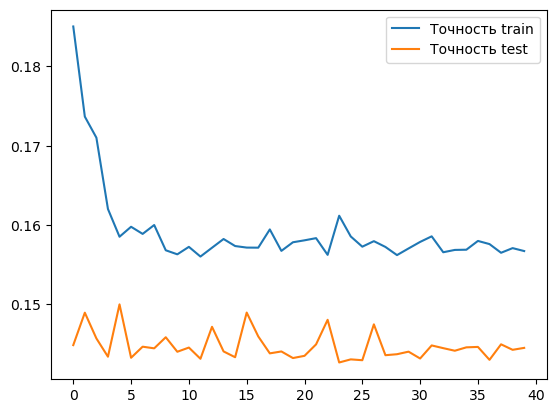

In [31]:
# модель полносвязной нейронной сети
modelNN_Emod = Sequential()
modelNN_Emod.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Emod.add(Dropout(0.5))
modelNN_Emod.add(Dense(32, activation = 'sigmoid'))
modelNN_Emod.add(Dense(1, activation = 'relu'))
modelNN_Emod.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Emod.summary()
history = modelNN_Emod.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 1s - loss: 0.0841 - mae: 0.2310 - val_loss: 0.0501 - val_mae: 0.1818 - 749ms/epoch - 39ms/step
Epoch 2/40
19/19 - 0s - loss: 0.0564 - mae: 0.1892 - val_loss: 0.0397 - va

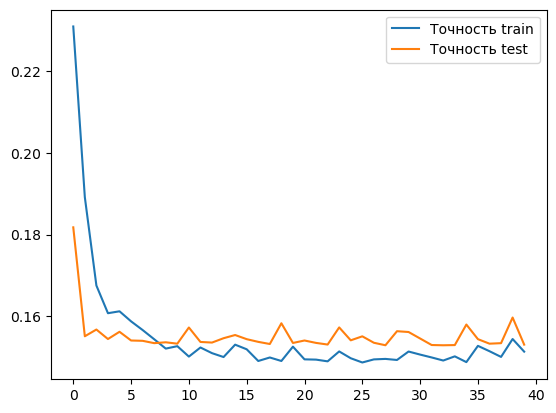

In [32]:
# модель полносвязной нейронной сети
modelNN_Rm = Sequential()
modelNN_Rm.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Rm.add(Dropout(0.5))
modelNN_Rm.add(Dense(32, activation = 'sigmoid'))
modelNN_Rm.add(Dense(1, activation = 'relu'))
modelNN_Rm.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Rm.summary()
history = modelNN_Rm.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

In [33]:
y_pred_Emod = modelNN_Emod.predict(X_test_norm)
y_pred_Rm = modelNN_Rm.predict(X_test_norm)

y_pred = np.hstack((y_pred_Emod,y_pred_Rm))
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_NN_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_NN_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
MSE_NN_Emod = mean_squared_error(y_test.iloc[:,0],y_pred[:,0])
MSE_NN_Rm = mean_squared_error(y_test.iloc[:,1],y_pred[:,1])
R2_NN_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_NN_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_NN_Emod)
print (MAE_NN_Rm)
print (MSE_NN_Emod)
print (MSE_NN_Rm)
print (R2_NN_Emod)
print (R2_NN_Rm)

9/9 [==============================] - 0s 1ms/step
2.58178878012848
369.2525806219462
9.976288024336704
214975.49119636585
-0.006652359479687453
-0.004340721250525537


In [34]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['NeuralNetwork',MAE_NN_Emod])
MAE_Rm.append(['NeuralNetwork',MAE_NN_Rm])
MSE_Emod.append(['NeuralNetwork',MSE_NN_Emod])
MSE_Rm.append(['NeuralNetwork',MSE_NN_Rm])
R2_Emod.append(['NeuralNetwork',R2_NN_Emod])
R2_Rm.append(['NeuralNetwork',R2_NN_Rm])

### Результаты тестирования моделей

In [35]:
# Результаты - Модуль упругости при растяжении
a = np.array(MAE_Emod)
b = np.array(MSE_Emod)
c = np.array(R2_Emod)

Emod_errors = pd.DataFrame({'Модель регрессии для модуля упругости при растяжении': 
                            a[:,0], 'MAE': a[:,1], 'MSE': b[:,1], 'R2': c[:,1]})
Emod_errors

,Модель регрессии для модуля упругости при растяжении,MAE,MSE,R2
0,Linear,2.6109355505901184,10.152935631185066,-0.024476898005094228
1,Ridge,2.599809397945461,10.084931091094134,-0.017614933858623116
2,Lasso,2.5948108078737024,10.09572202309215,-0.018703787461314736
3,ElasticNet,2.5801929025662833,9.998351572705044,-0.00887867080603466
4,GradientBoosting,2.688337119684182,11.060463664605681,-0.11605056086529042
5,KNeighbors,2.6225621597024773,10.325154738425082,-0.04185458098976058
6,DecisionTree,2.6475022346453074,10.735862076079544,-0.08329679972852566
7,RandomForest,2.6088418329608953,10.229476832211217,-0.03220024965877766
8,AdaBoost,2.6362227201727104,10.51628717813246,-0.06114070433896446
9,NeuralNetwork,2.58178878012848,9.976288024336704,-0.006652359479687453


In [36]:
# Результаты - Прочность при растяжении
d = np.array(MAE_Rm)
e = np.array(MSE_Rm)
f = np.array(R2_Rm)

Rm_errors = pd.DataFrame({'Модель регрессии для прочности при растяжении': 
                          c[:,0], 'MAE': d[:,1], 'MSE': e[:,1], 'R2': f[:,1]})
Rm_errors

,Модель регрессии для прочности при растяжении,MAE,MSE,R2
0,Linear,372.05238450611114,214801.90979576955,-0.003529768950333745
1,Ridge,369.8851530162007,213957.89742814057,0.00041335956785881756
2,Lasso,368.9355592328838,213322.56630912074,0.0033815533408245724
3,ElasticNet,368.8669394882762,214058.58303888745,-5.703200261408803e-05
4,GradientBoosting,382.3630823863721,225293.68233621877,-0.052546121195093054
5,KNeighbors,400.581653879789,250632.24504259886,-0.1709249661618053
6,DecisionTree,400.581653879789,250632.24504259886,-0.1709249661618053
7,RandomForest,371.70866592246307,215391.77060326247,-0.006285530667811123
8,AdaBoost,380.60470783191033,225004.53185850382,-0.05119524348469895
9,NeuralNetwork,369.2525806219462,214975.49119636585,-0.004340721250525537


# ИНС для Соотношения матрица-наполнитель

In [38]:
# хранение оценок моделей нейронной сети для Соотношения матрица-наполнитель
MAE=[]
MSE=[]
R2=[]

In [39]:
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
X.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [40]:
y = df[['Соотношение матрица-наполнитель']]
y.head()

,Соотношение матрица-наполнитель
1,1.857143
3,1.857143
4,2.771331
5,2.767918
6,2.569620


In [41]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [42]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data = scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [43]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)


In [44]:
 X_test_norm

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.387108,0.381499,0.622262,0.0,0.706867,0.419113
377,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.742719,0.605408,0.528535,0.0,0.536400,0.710983
538,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.364855,0.708160,0.347209,1.0,0.425178,0.579405
296,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.435807,0.438781,0.443355,0.0,0.741162,0.504853
531,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.468100,0.061865,0.307091,1.0,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.359362,0.854766,0.445939,0.0,0.401549,0.717647
133,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.446885,0.347529,0.672341,0.0,0.291997,0.552182
490,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.609638,0.503825,0.493243,1.0,0.804264,0.611119
558,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.372351,0.568094,0.135191,1.0,0.288131,0.309775


In [45]:
 X_test

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
360,2013.208862,429.919092,62.743272,23.961233,248.849293,322.220632,71.758909,2167.533030,250.822178,0,9.718023,52.698107
427,2000.192995,751.441920,131.529481,22.208465,283.432980,73.430795,77.238628,2705.819718,223.967368,0,7.383516,69.437048
611,2110.985588,31.608469,101.935506,19.462720,242.918105,688.874406,71.416004,2952.839631,172.013665,90,5.860357,61.890952
336,2023.785804,723.921402,136.901365,21.650138,327.402856,726.627740,72.509332,2305.241225,199.561589,0,10.187672,57.615327
604,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,73.006935,1399.118555,160.519027,90,10.264664,73.738350
...,...,...,...,...,...,...,...,...,...,...,...,...
479,1983.452057,1026.233755,103.222956,18.009823,243.580494,733.269062,71.331364,3305.286922,200.302003,0,5.536762,69.819230
149,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039,0,4.036464,60.329680
561,1989.373378,1209.768416,120.442159,22.656622,228.057719,546.080894,75.187942,2461.609016,213.855449,90,11.051849,63.709816
632,1961.550076,1490.320115,122.233630,24.476798,332.384000,534.070329,71.531521,2616.114331,111.265919,90,3.983520,46.427463


In [46]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 12)
(277, 12)
(645, 1)
(277, 1)


In [47]:
# функция для построения графика обучения
def plot_ANN(history):
    plt.plot(history.history['mae'], label = 'Точность train')
    plt.plot(history.history['val_mae'], label = 'Точность test')
    plt.xlabel = ('Epochs')
    plt.ylabel = ('MAE')
    plt.legend()
    plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 1s - loss: 0.2839 - mae: 0.4980 - val_loss: 0.2930 - val_mae: 0.5075 - 882ms/epoch - 46ms/step
Epoch 2/50
19/19 - 0s - loss: 0.2839 - mae: 0.4980 - val_loss: 0.2930 - va

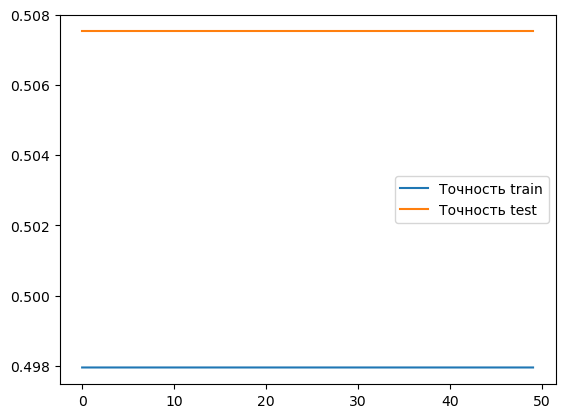

In [48]:
# модель ИНС 1
ANN_1 = Sequential()
ANN_1.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_1.add(Dropout(0.5))
ANN_1.add(Dense(32, activation = 'sigmoid'))
ANN_1.add(Dense(1, activation = 'relu'))
ANN_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_1.summary()
history = ANN_1.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                208       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 1s - loss: 0.0637 - mae: 0.2063 - val_loss: 0.0410 - val_mae: 0.1651 - 756ms/epoch - 40ms/step
Epoch 2/50
19/19 - 0s - loss: 0.0464 - mae: 0.1742 - val_loss: 0.0354 - va

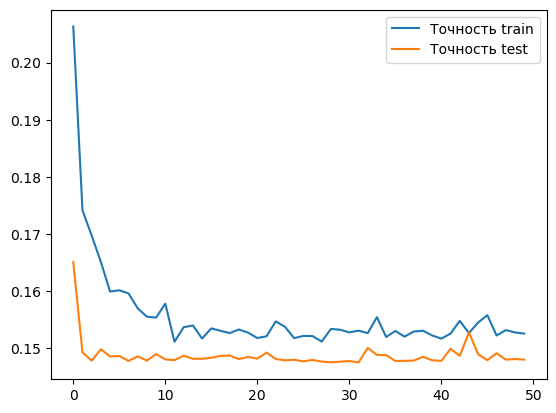

In [49]:
# модель ИНС 2
ANN_2 = Sequential()
ANN_2.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_2.add(Dropout(0.5))
ANN_2.add(Dense(32, activation = 'sigmoid'))
ANN_2.add(Dense(1, activation = 'tanh'))
ANN_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_2.summary()
history = ANN_2.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                416       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                

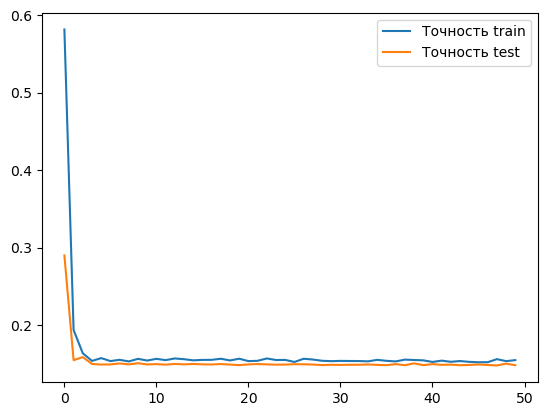

In [50]:
# модель ИНС 3
ANN_3 = Sequential([
                Dense(32,  input_dim=12, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
ANN_3.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_3.summary()
history = ANN_3.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                208       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-traina

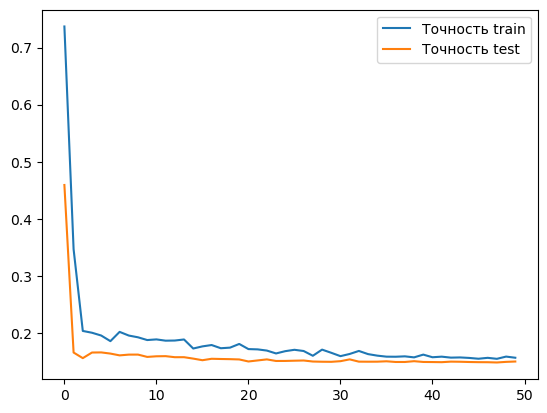

In [51]:
# модель ИНС 4
ANN_4 = Sequential()
ANN_4.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(32, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(16, activation = 'sigmoid'))
ANN_4.add(Dense(1, activation = 'tanh'))
ANN_4.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_4.summary()
history = ANN_4.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                832       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

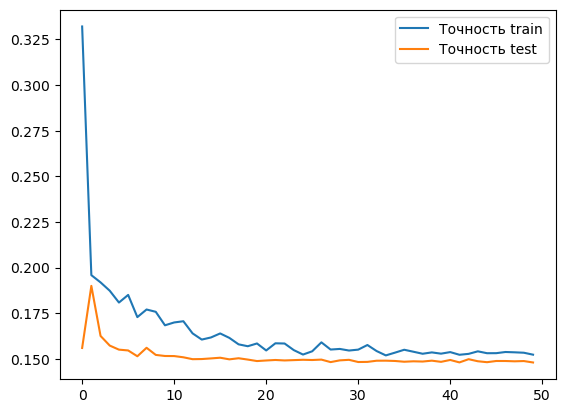

In [52]:
# модель ИНС 5
ANN_5 = Sequential()
ANN_5.add(Dense(64,  input_dim=12, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(32, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(16, activation = 'sigmoid'))
ANN_5.add(Dense(1, activation = 'tanh'))
ANN_5.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_5.summary()
history = ANN_5.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               1664      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)               

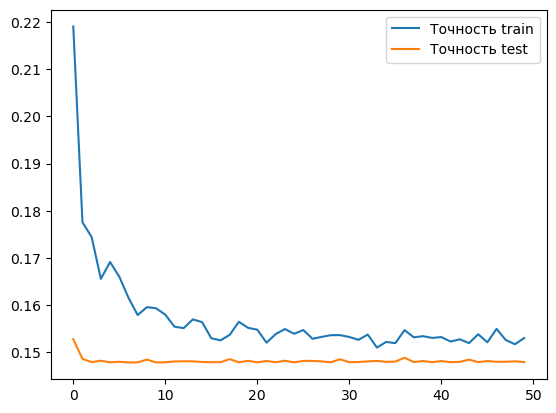

In [53]:
# модель ИНС 6
ANN_6 = Sequential()
ANN_6.add(Dense(128,  input_dim=12, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(64, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(32, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(16, activation = 'sigmoid'))
ANN_6.add(Dense(1, activation = 'tanh'))
ANN_6.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_6.summary()
history = ANN_6.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1300      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 51        
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

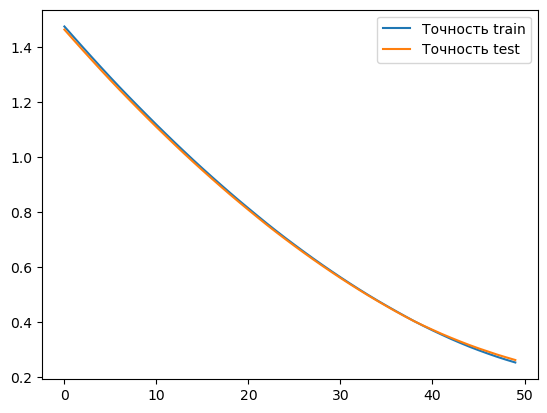

In [54]:
# модель ИНС 7
ANN_7 = Sequential()
ANN_7.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(50, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(1, activation='softmax'))
ANN_7.add(Dense(1, activation='linear'))
ANN_7.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_7.summary()
history = ANN_7.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1300      
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_36 (Dense)            (None, 25)                1275      
                                                                 
 dense_37 (Dense)            (None, 1)                

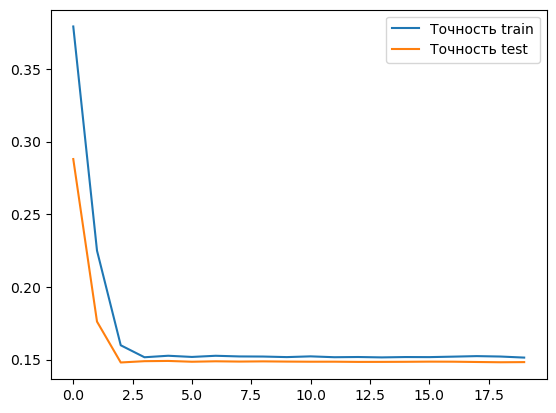

In [55]:
# модель ИНС 8
ANN_8 = Sequential()
ANN_8.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_8.add(Dropout(0.5))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(50, activation='sigmoid'))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(25, activation='softmax'))
ANN_8.add(Dense(1, activation='linear'))
ANN_8.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_8.summary()
history = ANN_8.fit(X_train_norm,y_train_norm, epochs=20, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                208       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 1s - loss: 0.4503 - mae: 0.6068 - va

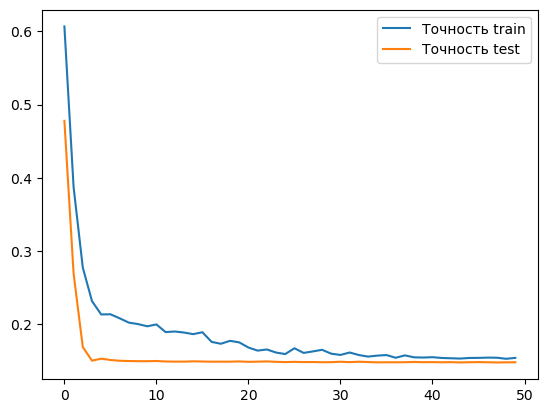

In [56]:
# модель ИНС 9
ANN_9 = Sequential()
ANN_9.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_9.add(Dropout(0.5))
ANN_9.add(LeakyReLU(alpha=1.0))
ANN_9.add(Dense(8, activation='sigmoid'))
ANN_9.add(Dense(1, activation='linear'))
ANN_9.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_9.summary()
history = ANN_9.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 16)                208       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 - 1s - loss: 1.3965 - mae: 1.1533 - v

Epoch 64/100
19/19 - 0s - loss: 0.0462 - mae: 0.1727 - val_loss: 0.0370 - val_mae: 0.1539 - 54ms/epoch - 3ms/step
Epoch 65/100
19/19 - 0s - loss: 0.0442 - mae: 0.1667 - val_loss: 0.0367 - val_mae: 0.1530 - 52ms/epoch - 3ms/step
Epoch 66/100
19/19 - 0s - loss: 0.0453 - mae: 0.1707 - val_loss: 0.0368 - val_mae: 0.1535 - 52ms/epoch - 3ms/step
Epoch 67/100
19/19 - 0s - loss: 0.0445 - mae: 0.1705 - val_loss: 0.0370 - val_mae: 0.1540 - 56ms/epoch - 3ms/step
Epoch 68/100
19/19 - 0s - loss: 0.0455 - mae: 0.1715 - val_loss: 0.0373 - val_mae: 0.1547 - 52ms/epoch - 3ms/step
Epoch 69/100
19/19 - 0s - loss: 0.0454 - mae: 0.1704 - val_loss: 0.0370 - val_mae: 0.1540 - 56ms/epoch - 3ms/step
Epoch 70/100
19/19 - 0s - loss: 0.0442 - mae: 0.1683 - val_loss: 0.0369 - val_mae: 0.1538 - 52ms/epoch - 3ms/step
Epoch 71/100
19/19 - 0s - loss: 0.0439 - mae: 0.1666 - val_loss: 0.0364 - val_mae: 0.1521 - 52ms/epoch - 3ms/step
Epoch 72/100
19/19 - 0s - loss: 0.0433 - mae: 0.1646 - val_loss: 0.0365 - val_mae: 0.152

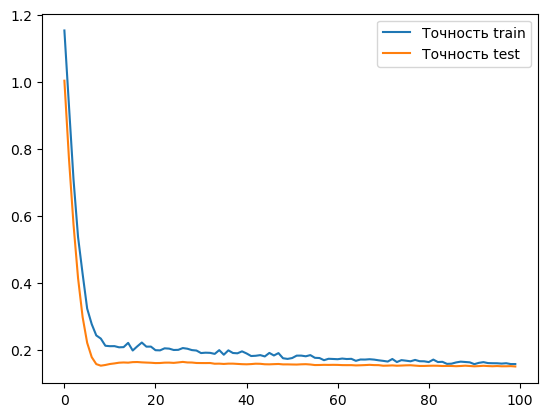

In [57]:
# модель ИНС 10
ANN_10 = Sequential()
ANN_10.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_10.add(Dropout(0.5))
ANN_10.add(LeakyReLU(alpha=1.0))
ANN_10.add(Dense(8, activation='sigmoid'))
ANN_10.add(Dense(1, activation='linear'))
ANN_10.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_10.summary()
history = ANN_10.fit(X_train_norm,y_train_norm, epochs=100, validation_split=0.1, verbose=2)
plot_ANN(history)

In [59]:
y_pred_1 = scaler_norm_y.inverse_transform (ANN_1.predict(X_test_norm))
y_pred_2 = scaler_norm_y.inverse_transform (ANN_2.predict(X_test_norm))
y_pred_3 = scaler_norm_y.inverse_transform (ANN_3.predict(X_test_norm))
y_pred_4 = scaler_norm_y.inverse_transform (ANN_4.predict(X_test_norm))
y_pred_5 = scaler_norm_y.inverse_transform (ANN_5.predict(X_test_norm))
y_pred_6 = scaler_norm_y.inverse_transform (ANN_6.predict(X_test_norm))
y_pred_7 = scaler_norm_y.inverse_transform (ANN_7.predict(X_test_norm))
y_pred_8 = scaler_norm_y.inverse_transform (ANN_8.predict(X_test_norm))
y_pred_9 = scaler_norm_y.inverse_transform (ANN_9.predict(X_test_norm))
y_pred_10 = scaler_norm_y.inverse_transform (ANN_10.predict(X_test_norm))

MAE_1 = mean_absolute_error(y_test,y_pred_1)
MSE_1 = mean_squared_error(y_test,y_pred_1)
R2_1 = r2_score(y_test,y_pred_1)
print (MAE_1, MSE_1, R2_1)

MAE_2 = mean_absolute_error(y_test,y_pred_2)
MSE_2 = mean_squared_error(y_test,y_pred_2)
R2_2 = r2_score(y_test,y_pred_2)
print (MAE_2, MSE_2, R2_2)

MAE_3 = mean_absolute_error(y_test,y_pred_3)
MSE_3 = mean_squared_error(y_test,y_pred_3)
R2_3 = r2_score(y_test,y_pred_3)
print (MAE_3, MSE_3, R2_3)

MAE_4 = mean_absolute_error(y_test,y_pred_4)
MSE_4 = mean_squared_error(y_test,y_pred_4)
R2_4 = r2_score(y_test,y_pred_4)
print (MAE_4, MSE_4, R2_4)

MAE_5 = mean_absolute_error(y_test,y_pred_5)
MSE_5 = mean_squared_error(y_test,y_pred_5)
R2_5 = r2_score(y_test,y_pred_5)
print (MAE_5, MSE_5, R2_5)

MAE_6 = mean_absolute_error(y_test,y_pred_6)
MSE_6 = mean_squared_error(y_test,y_pred_6)
R2_6 = r2_score(y_test,y_pred_6)
print (MAE_6, MSE_6, R2_6)

MAE_7 = mean_absolute_error(y_test,y_pred_7)
MSE_7 = mean_squared_error(y_test,y_pred_7)
R2_7 = r2_score(y_test,y_pred_7)
print (MAE_7, MSE_7, R2_7)

MAE_8 = mean_absolute_error(y_test,y_pred_8)
MSE_8 = mean_squared_error(y_test,y_pred_8)
R2_8 = r2_score(y_test,y_pred_8)
print (MAE_8, MSE_8, R2_8)

MAE_9 = mean_absolute_error(y_test,y_pred_9)
MSE_9 = mean_squared_error(y_test,y_pred_9)
R2_9 = r2_score(y_test,y_pred_9)
print (MAE_9, MSE_9, R2_9)

MAE_10 = mean_absolute_error(y_test,y_pred_10)
MSE_10 = mean_squared_error(y_test,y_pred_10)
R2_10 = r2_score(y_test,y_pred_10)
print (MAE_10, MSE_10, R2_10)

9/9 [==============================] - 0s 1ms/step
2.386060661491529 6.45774411548042 -7.4474735694538445
0.7137162029574031 0.7679923222381272 -0.004622469957904052
0.7104158222844613 0.7644645654075289 -7.757443281297682e-06
0.7143640262384645 0.775958358616658 -0.015042963640772733
0.7116793262948142 0.7653706815770234 -0.001193061824467545
0.7131466493755869 0.7667935002491898 -0.003054272630024002
1.19195047989152 1.9860870722335884 -1.598030790521507
0.7101724567930656 0.7637227176227177 0.0009626649585182667
0.711454842236497 0.7661455688434341 -0.0022067036760575753
0.7133339033046622 0.7730611124592092 -0.011253031754097309


In [60]:
# записываем данные об ошибках в итоговую таблицу
error=[]
error.append(['Нейросеть 1',MAE_1,MSE_1,R2_1])
error.append(['Нейросеть 2',MAE_2,MSE_2,R2_2])
error.append(['Нейросеть 3',MAE_3,MSE_3,R2_3])
error.append(['Нейросеть 4',MAE_4,MSE_4,R2_4])
error.append(['Нейросеть 5',MAE_5,MSE_5,R2_5])
error.append(['Нейросеть 6',MAE_6,MSE_6,R2_6])
error.append(['Нейросеть 7',MAE_7,MSE_7,R2_7])
error.append(['Нейросеть 8',MAE_8,MSE_8,R2_8])
error.append(['Нейросеть 9',MAE_9,MSE_9,R2_9])
error.append(['Нейросеть 10',MAE_10,MSE_10,R2_10])

In [61]:
#  результаты
g = np.array(error)

errors = pd.DataFrame({'Версия нейросети': g[:,0], 'MAE': g[:,1], 'MSE': g[:,2], 'R2': g[:,3]})
errors

,Версия нейросети,MAE,MSE,R2
0,Нейросеть 1,2.386060661491529,6.45774411548042,-7.4474735694538445
1,Нейросеть 2,0.7137162029574031,0.7679923222381272,-0.004622469957904052
2,Нейросеть 3,0.7104158222844613,0.7644645654075289,-7.757443281297682e-06
3,Нейросеть 4,0.7143640262384645,0.775958358616658,-0.015042963640772733
4,Нейросеть 5,0.7116793262948142,0.7653706815770234,-0.001193061824467545
5,Нейросеть 6,0.7131466493755869,0.7667935002491898,-0.003054272630024002
6,Нейросеть 7,1.19195047989152,1.9860870722335884,-1.598030790521507
7,Нейросеть 8,0.7101724567930656,0.7637227176227177,0.0009626649585182667
8,Нейросеть 9,0.711454842236497,0.7661455688434341,-0.0022067036760575753
9,Нейросеть 10,0.7133339033046622,0.7730611124592092,-0.011253031754097309


Text(0.5, 1.0, 'R2')

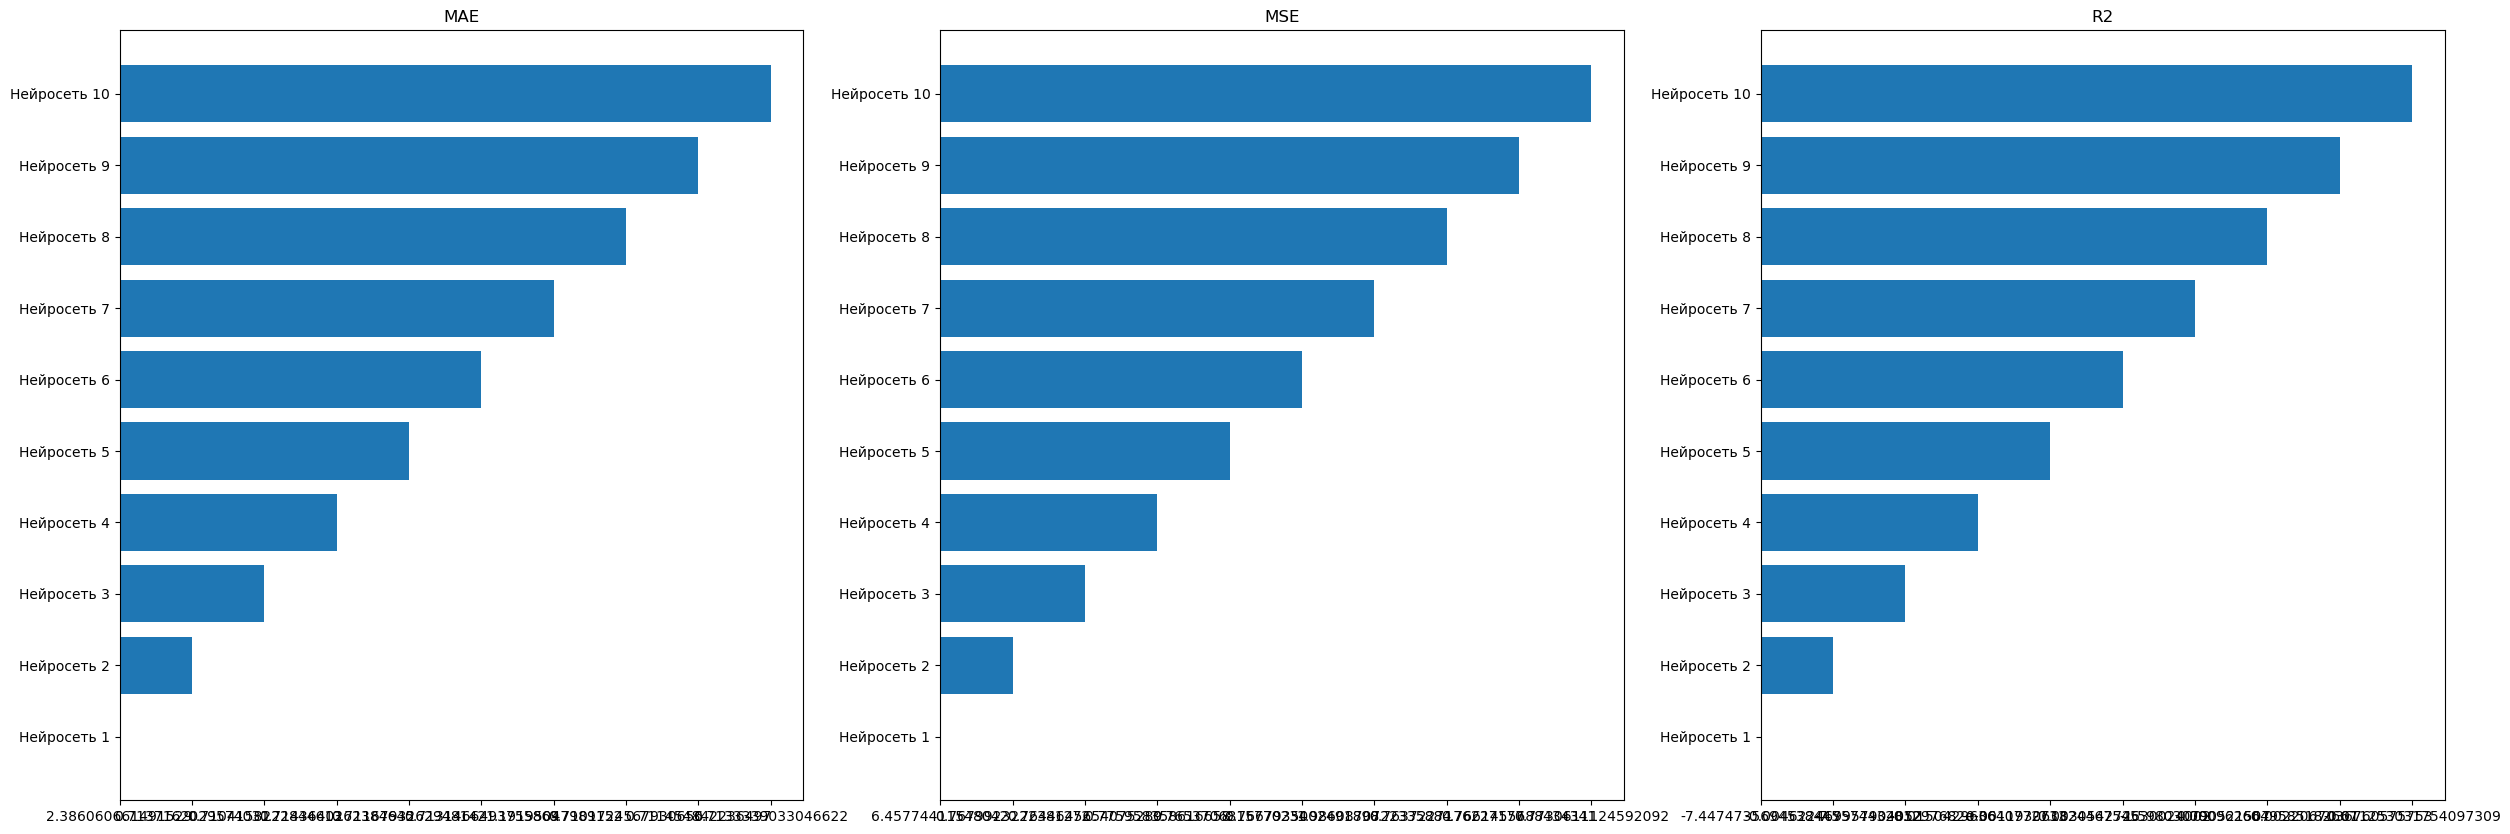

In [65]:
# Гистограммы ошибок
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.barh(errors['Версия нейросети'], errors['MAE'])
plt.title('MAE')
plt.subplot(132)
plt.barh(errors['Версия нейросети'], errors['MSE'])
plt.title('MSE')
plt.subplot(133)
plt.barh(errors['Версия нейросети'], errors['R2'])
plt.title('R2')

In [66]:
# Запишем результаты сравнения в файл
errors.to_excel('../models/errors.xlsx')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 100)               1300      
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_53 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 50)                0         
                                                                 
 dense_54 (Dense)            (None, 25)                1275      
                                                                 
 dense_55 (Dense)            (None, 1)               

Epoch 62/150
19/19 - 0s - loss: 1.3790 - mae: 0.9502 - val_loss: 1.4197 - val_mae: 0.9843 - 70ms/epoch - 4ms/step
Epoch 63/150
19/19 - 0s - loss: 1.3495 - mae: 0.9390 - val_loss: 1.3892 - val_mae: 0.9710 - 67ms/epoch - 4ms/step
Epoch 64/150
19/19 - 0s - loss: 1.3222 - mae: 0.9282 - val_loss: 1.3613 - val_mae: 0.9593 - 66ms/epoch - 3ms/step
Epoch 65/150
19/19 - 0s - loss: 1.2961 - mae: 0.9180 - val_loss: 1.3342 - val_mae: 0.9477 - 63ms/epoch - 3ms/step
Epoch 66/150
19/19 - 0s - loss: 1.2713 - mae: 0.9083 - val_loss: 1.3091 - val_mae: 0.9367 - 60ms/epoch - 3ms/step
Epoch 67/150
19/19 - 0s - loss: 1.2477 - mae: 0.8990 - val_loss: 1.2836 - val_mae: 0.9256 - 59ms/epoch - 3ms/step
Epoch 68/150
19/19 - 0s - loss: 1.2246 - mae: 0.8893 - val_loss: 1.2587 - val_mae: 0.9151 - 60ms/epoch - 3ms/step
Epoch 69/150
19/19 - 0s - loss: 1.2024 - mae: 0.8802 - val_loss: 1.2364 - val_mae: 0.9055 - 59ms/epoch - 3ms/step
Epoch 70/150
19/19 - 0s - loss: 1.1814 - mae: 0.8713 - val_loss: 1.2141 - val_mae: 0.895

Epoch 134/150
19/19 - 0s - loss: 0.8193 - mae: 0.7224 - val_loss: 0.8127 - val_mae: 0.7050 - 65ms/epoch - 3ms/step
Epoch 135/150
19/19 - 0s - loss: 0.8191 - mae: 0.7223 - val_loss: 0.8122 - val_mae: 0.7050 - 66ms/epoch - 3ms/step
Epoch 136/150
19/19 - 0s - loss: 0.8189 - mae: 0.7224 - val_loss: 0.8117 - val_mae: 0.7051 - 60ms/epoch - 3ms/step
Epoch 137/150
19/19 - 0s - loss: 0.8189 - mae: 0.7224 - val_loss: 0.8117 - val_mae: 0.7051 - 64ms/epoch - 3ms/step
Epoch 138/150
19/19 - 0s - loss: 0.8188 - mae: 0.7224 - val_loss: 0.8111 - val_mae: 0.7051 - 63ms/epoch - 3ms/step
Epoch 139/150
19/19 - 0s - loss: 0.8186 - mae: 0.7224 - val_loss: 0.8110 - val_mae: 0.7052 - 63ms/epoch - 3ms/step
Epoch 140/150
19/19 - 0s - loss: 0.8185 - mae: 0.7224 - val_loss: 0.8108 - val_mae: 0.7052 - 62ms/epoch - 3ms/step
Epoch 141/150
19/19 - 0s - loss: 0.8184 - mae: 0.7224 - val_loss: 0.8105 - val_mae: 0.7052 - 63ms/epoch - 3ms/step
Epoch 142/150
19/19 - 0s - loss: 0.8184 - mae: 0.7224 - val_loss: 0.8103 - val_m

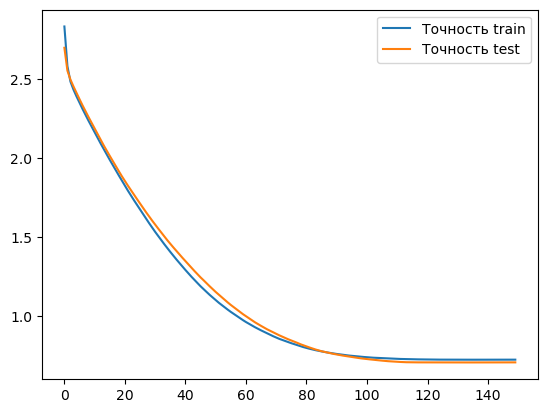

In [69]:
# модель ИНС 8 на очищенных данных до нормализации
ANN = Sequential()
ANN.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN.add(Dropout(0.5))
ANN.add(LeakyReLU(alpha=1.0))
ANN.add(Dense(50, activation='sigmoid'))
ANN.add(LeakyReLU(alpha=1.0))
ANN.add(Dense(25, activation='softmax'))
ANN.add(Dense(1, activation='linear'))
ANN.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN.summary()
history = ANN.fit(X_train,y_train, epochs=150, validation_split=0.1, verbose=2)
plot_ANN(history)

In [70]:
y_pred = ANN.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print (MAE, MSE, R2)

9/9 [==============================] - 0s 1ms/step
0.7112392185085462 0.7649458473105443 -0.0006373296410138174


# Сохранение модели

In [71]:
ANN.save('model_ANN')

INFO:tensorflow:Assets written to: model_ANN\assets


INFO:tensorflow:Assets written to: model_ANN\assets


In [73]:
!pip freeze > ../requirements.txt